In [3]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
X_train.shape

(379, 104)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression().fit(X_train, y_train)

In [10]:
lr.score(X_train, y_train)

0.9520519609032732

In [11]:
lr.score(X_test, y_test)

0.607472195966575

#### Ridge regression

In [12]:
from sklearn.linear_model import Ridge

In [13]:
ridge = Ridge().fit(X_train, y_train)

In [14]:
ridge.score(X_train, y_train)

0.885796658517094

In [15]:
ridge.score(X_test, y_test)

0.7527683481744755

In [16]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

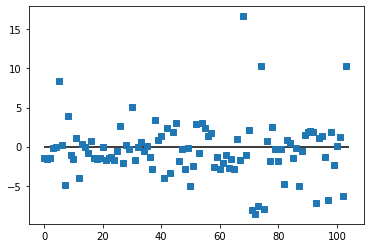

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(ridge.coef_, 's', label="Ridge alpha=1")
ax.hlines(0, 0, len(lr.coef_))

### Logistic regression and SVM

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [4]:
X, y = mglearn.datasets.make_forge()

/Users/stevehu/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
X.shape

(26, 2)

In [6]:
y.shape

(26,)

/Users/stevehu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/stevehu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


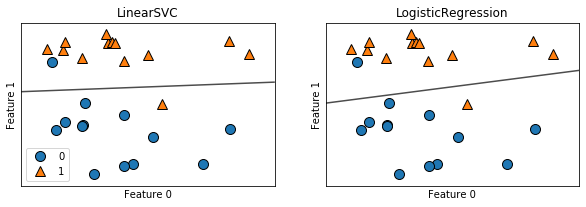

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()